## shraavya  G kunch - 221710313052
## WEATHER FORCASTING - Project name 
## PROBLEM STATEMENT:
## Aim of the project : To know the weather report based on the data given in the coloumns. 
## Analyzing the problem : We can solve the problem with the help of machine learning.
## Train the model : using RNN 



In [1]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
import tensorflow as tf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Analyzing the data: 

In [2]:
 
 Data = pd.read_csv('/content/drive/My Drive/weather/shraavya/projectdata.csv',header = 0,encoding= 'unicode_escape')
 Data

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
0,01.01.2020 00:10:00,1008.89,0.71,273.18,-1.33,86.1,6.43,5.54,0.89,3.42,5.49,1280.62,1.02,1.60,224.3,0.0,0,0.00,0.00,0.00,11.45,428.1
1,01.01.2020 00:20:00,1008.76,0.75,273.22,-1.44,85.2,6.45,5.49,0.95,3.39,5.45,1280.33,0.43,0.84,206.8,0.0,0,0.00,0.00,0.00,11.51,428.0
2,01.01.2020 00:30:00,1008.66,0.73,273.21,-1.48,85.1,6.44,5.48,0.96,3.39,5.43,1280.29,0.61,1.48,197.1,0.0,0,0.00,0.00,0.00,11.60,427.6
3,01.01.2020 00:40:00,1008.64,0.37,272.86,-1.64,86.3,6.27,5.41,0.86,3.35,5.37,1281.97,1.11,1.48,206.4,0.0,0,0.00,0.00,0.00,11.70,430.0
4,01.01.2020 00:50:00,1008.61,0.33,272.82,-1.50,87.4,6.26,5.47,0.79,3.38,5.42,1282.08,0.49,1.40,209.6,0.0,0,0.00,0.00,0.00,11.81,432.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27290,08.07.2020 13:50:00,990.23,14.77,288.73,12.08,83.9,16.83,14.12,2.71,8.92,14.26,1191.64,1.29,2.17,221.8,0.0,350,227.40,496.45,601.39,25.58,405.2
27291,08.07.2020 14:00:00,990.23,14.75,288.71,11.84,82.7,16.81,13.90,2.91,8.78,14.04,1191.83,1.23,2.17,211.7,0.0,410,162.56,356.90,422.91,25.72,406.6
27292,08.07.2020 14:10:00,990.23,14.68,288.64,12.12,84.6,16.73,14.15,2.58,8.94,14.29,1192.00,1.17,2.07,250.8,0.0,120,110.14,243.99,272.75,25.84,405.6
27293,08.07.2020 14:20:00,990.27,14.47,288.43,12.18,86.1,16.50,14.21,2.29,8.97,14.35,1192.89,1.24,1.90,222.6,0.0,100,115.28,256.61,336.03,25.91,405.9


In [3]:
Data.columns

Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)', 'rain (mm)', 'raining (s)', 'SWDR (W/m²)',
       'PAR (µmol/m²/s)', 'max. PAR (µmol/m²/s)', 'Tlog (degC)', 'CO2 (ppm)'],
      dtype='object')

In [4]:
Data.dtypes

Date Time                object
p (mbar)                float64
T (degC)                float64
Tpot (K)                float64
Tdew (degC)             float64
rh (%)                  float64
VPmax (mbar)            float64
VPact (mbar)            float64
VPdef (mbar)            float64
sh (g/kg)               float64
H2OC (mmol/mol)         float64
rho (g/m**3)            float64
wv (m/s)                float64
max. wv (m/s)           float64
wd (deg)                float64
rain (mm)               float64
raining (s)               int64
SWDR (W/m²)             float64
PAR (µmol/m²/s)         float64
max. PAR (µmol/m²/s)    float64
Tlog (degC)             float64
CO2 (ppm)               float64
dtype: object

# Data pre-processing:

In [5]:
Data.isnull().sum() #checking for total null values


Date Time               0
p (mbar)                0
T (degC)                0
Tpot (K)                0
Tdew (degC)             0
rh (%)                  0
VPmax (mbar)            0
VPact (mbar)            0
VPdef (mbar)            0
sh (g/kg)               0
H2OC (mmol/mol)         0
rho (g/m**3)            0
wv (m/s)                0
max. wv (m/s)           0
wd (deg)                0
rain (mm)               0
raining (s)             0
SWDR (W/m²)             0
PAR (µmol/m²/s)         0
max. PAR (µmol/m²/s)    0
Tlog (degC)             0
CO2 (ppm)               0
dtype: int64

In [6]:
Data.isna().sum() #checking for missing values

Date Time               0
p (mbar)                0
T (degC)                0
Tpot (K)                0
Tdew (degC)             0
rh (%)                  0
VPmax (mbar)            0
VPact (mbar)            0
VPdef (mbar)            0
sh (g/kg)               0
H2OC (mmol/mol)         0
rho (g/m**3)            0
wv (m/s)                0
max. wv (m/s)           0
wd (deg)                0
rain (mm)               0
raining (s)             0
SWDR (W/m²)             0
PAR (µmol/m²/s)         0
max. PAR (µmol/m²/s)    0
Tlog (degC)             0
CO2 (ppm)               0
dtype: int64

In [7]:
Data.nunique() #checking for unique values

Date Time               27294
p (mbar)                 4550
T (degC)                 3161
Tpot (K)                 3326
Tdew (degC)              2880
rh (%)                   4694
VPmax (mbar)             2452
VPact (mbar)             1848
VPdef (mbar)             2010
sh (g/kg)                1218
H2OC (mmol/mol)          1884
rho (g/m**3)            11965
wv (m/s)                  960
max. wv (m/s)            1289
wd (deg)                 6546
rain (mm)                  31
raining (s)                61
SWDR (W/m²)              7216
PAR (µmol/m²/s)          8747
max. PAR (µmol/m²/s)     7786
Tlog (degC)              3115
CO2 (ppm)                 974
dtype: int64

In [8]:
Data.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
count,27295.000000,27295.000000,27295.000000,27295.000000,27295.000000,27295.000000,27295.000000,27295.000000,27295.000000,27295.000000,27295.000000,27295.000000,27295.000000,27295.000000,27295.000000,27295.000000,27295.000000,27295.000000,27295.000000,27295.000000,27295.000000
mean,990.918302,9.414767,283.318863,3.277951,68.217354,12.962502,8.336430,4.626016,5.259250,8.423243,1218.535392,2.020501,4.025402,176.168304,0.010969,25.476461,148.509565,292.092832,347.980498,20.119191,413.046642
std,9.635078,6.777005,7.011616,5.782319,17.737643,6.214778,3.641203,4.324995,2.321683,3.702421,35.201858,60.562641,2.733417,85.756541,0.117806,109.726670,231.486303,450.759215,614.958018,6.848844,368.064687
min,962.080000,-6.440000,266.190000,-13.810000,21.160000,3.770000,2.090000,0.000000,1.300000,2.090000,1120.920000,-9999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9999.000000,6.960000,-9999.000000
25%,984.800000,4.130000,277.960000,-0.590000,54.770000,8.210000,5.850000,1.610000,3.680000,5.900000,1193.115000,1.040000,1.880000,120.300000,0.000000,0.000000,0.000000,0.000000,0.000000,14.840000,416.700000
50%,991.630000,8.740000,282.850000,2.340000,70.500000,11.290000,7.230000,3.060000,4.570000,7.320000,1218.190000,1.930000,3.400000,199.900000,0.000000,0.000000,10.060000,25.290000,31.080000,18.960000,422.100000
75%,997.110000,14.400000,288.350000,6.700000,82.500000,16.430000,9.820000,6.240000,6.180000,9.900000,1243.575000,3.255000,5.530000,234.250000,0.000000,0.000000,217.510000,432.475000,514.120000,24.780000,432.000000
max,1020.070000,29.440000,304.300000,20.500000,100.000000,41.150000,24.160000,23.180000,15.400000,24.530000,1318.520000,13.770000,22.900000,360.000000,11.200000,600.000000,1115.290000,2131.760000,2498.940000,41.530000,524.200000


In [9]:
Data.describe(include = ['object'])

,Date Time
count,27295
unique,27294
top,12.05.2020 06:00:00
freq,2


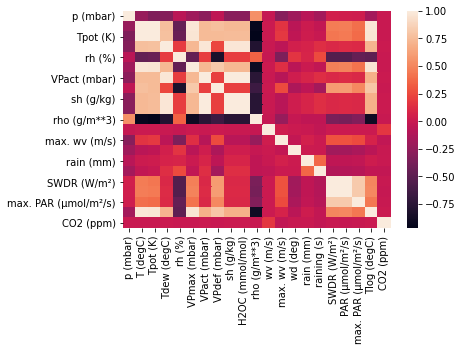

In [10]:
#visualzing the value with heatmap :
sns.heatmap(Data.corr())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff76fca06d8>,
      dtype=object)

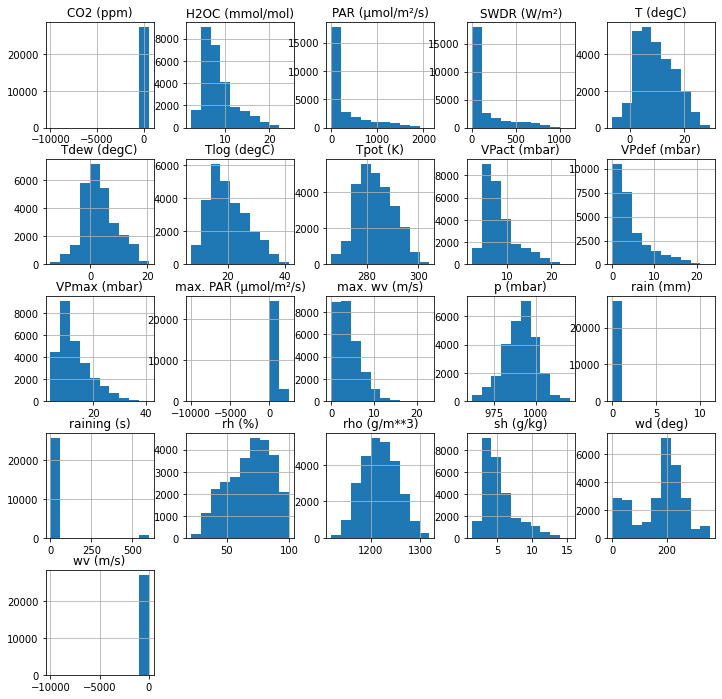

In [11]:
Data.hist(figsize=(12,12))

In [12]:
#dropping the irrelavant columns : 
df = pd.DataFrame(Data)

In [13]:
df.drop([  'Tdew (degC)',
       'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'max. wv (m/s)',
        'raining (s)', 'SWDR (W/m²)',
       'PAR (µmol/m²/s)', 'max. PAR (µmol/m²/s)', 'Tlog (degC)', 'CO2 (ppm)'],axis=1,inplace = True)

In [14]:
df.shape

(27295, 8)

In [15]:
df # data after the removing the irrelavant column

,Date Time,p (mbar),T (degC),Tpot (K),rh (%),wv (m/s),wd (deg),rain (mm)
0,01.01.2020 00:10:00,1008.89,0.71,273.18,86.1,1.02,224.3,0.0
1,01.01.2020 00:20:00,1008.76,0.75,273.22,85.2,0.43,206.8,0.0
2,01.01.2020 00:30:00,1008.66,0.73,273.21,85.1,0.61,197.1,0.0
3,01.01.2020 00:40:00,1008.64,0.37,272.86,86.3,1.11,206.4,0.0
4,01.01.2020 00:50:00,1008.61,0.33,272.82,87.4,0.49,209.6,0.0
...,...,...,...,...,...,...,...,...
27290,08.07.2020 13:50:00,990.23,14.77,288.73,83.9,1.29,221.8,0.0
27291,08.07.2020 14:00:00,990.23,14.75,288.71,82.7,1.23,211.7,0.0
27292,08.07.2020 14:10:00,990.23,14.68,288.64,84.6,1.17,250.8,0.0
27293,08.07.2020 14:20:00,990.27,14.47,288.43,86.1,1.24,222.6,0.0


In [16]:
features_considered = ['p (mbar)', 'T (degC)', 'rh (%)', 'wv (m/s)', 'wd (deg)', 'rain (mm)']

In [17]:
features = df[features_considered]
features.index = df['Date Time']
features.head()

,p (mbar),T (degC),rh (%),wv (m/s),wd (deg),rain (mm)
Date Time,,,,,,
01.01.2020 00:10:00,1008.89,0.71,86.1,1.02,224.3,0.0
01.01.2020 00:20:00,1008.76,0.75,85.2,0.43,206.8,0.0
01.01.2020 00:30:00,1008.66,0.73,85.1,0.61,197.1,0.0
01.01.2020 00:40:00,1008.64,0.37,86.3,1.11,206.4,0.0
01.01.2020 00:50:00,1008.61,0.33,87.4,0.49,209.6,0.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7aed49240>,
      dtype=object)

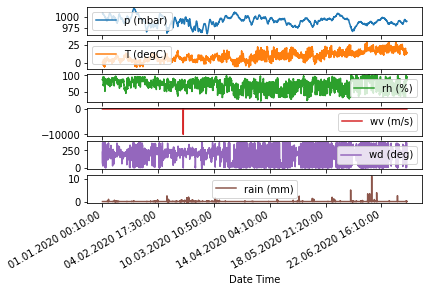

In [18]:
features.plot(subplots=True)

In [19]:
# comparing the pressure with the temperature : 
df[['p (mbar)','T (degC)']]

,p (mbar),T (degC)
0,1008.89,0.71
1,1008.76,0.75
2,1008.66,0.73
3,1008.64,0.37
4,1008.61,0.33
...,...,...
27290,990.23,14.77
27291,990.23,14.75
27292,990.23,14.68
27293,990.27,14.47


# LINEAR REGRESION : 

In [20]:
df_num=df[list(df.dtypes[df.dtypes!='object'].index)]

In [21]:
df_y=df_num.pop('Tpot (K)')
df_x=df_num

In [147]:
train_x,test_x,train_y,test_y=train_test_split(df_x,df_y,test_size=0.2,random_state=0)

In [148]:
train_x.head()

,p (mbar),T (degC),rh (%),wv (m/s),wd (deg),rain (mm)
22507,972.11,9.91,89.80,2.36,250.7,0.0
3151,1008.40,1.51,94.60,0.25,254.5,0.0
15028,996.54,3.36,61.96,2.37,30.5,0.0
12655,992.19,8.10,52.08,0.30,230.2,0.0
10060,979.04,9.03,82.70,6.87,208.5,0.0


In [149]:
model=LinearRegression()
model.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [152]:
prediction=model.predict(test_x)

In [153]:
np.mean((prediction-test_y)**2)

0.0003972153427985274

In [154]:
pd.DataFrame({'actual':test_y,'prediction':prediction,'difference':(test_y)-prediction})

,actual,prediction,difference
23081,287.60,287.606206,-0.006206
19763,279.80,279.814295,-0.014295
27142,291.60,291.612855,-0.012855
2396,281.29,281.298506,-0.008506
15999,279.78,279.782078,-0.002078
...,...,...,...
2942,269.21,269.123500,0.086500
18252,289.01,289.032708,-0.022708
24261,298.41,298.383654,0.026346
8245,276.07,276.090271,-0.020271


In [155]:
# The actual score of linear regression :
from sklearn.metrics import r2_score
r2_score(test_y,prediction)

0.9999918345088632

# training,testing ,prediction :

In [32]:
# Build the model on Training data--> X_train and y_train
# Sklearn library: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
# Intercept and the coefficient values
print(lm.intercept_)
lm.coef_

354.4350138822976


array([-8.12888945e-02,  1.00174860e+00,  1.44420543e-05,  1.63606061e-06,
        1.23457232e-05,  2.31364928e-04])

In [34]:
## Create a dataframe for coefficients
coefficients = pd.DataFrame([train_x.columns, lm.coef_]).T
coefficients

,0,1
0,p (mbar),-0.0812889
1,T (degC),1.00175
2,rh (%),1.44421e-05
3,wv (m/s),1.63606e-06
4,wd (deg),1.23457e-05
5,rain (mm),0.000231365


In [35]:
## Checking the model prediction on training data
y_train_pred = lm.predict(train_x)
y_train_pred

array([287.24400168, 288.17854775, 277.89708718, ..., 271.58603475,
       278.76662918, 278.87808233])

In [36]:
## We need to compare the actual values(y_train) and the predicted values(y_train_pred)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('R^2:', r2_score(train_y,y_train_pred))
print('Adjusted R^2:', 1- (1-r2_score(train_y, y_train_pred))*(len(train_x)-1)/(len(train_x)-train_x.shape[1]-1))
print('MAE:', mean_absolute_error(train_y, y_train_pred))
print('MSE:', mean_squared_error(train_y, y_train_pred))
print('RMSE', np.sqrt(mean_squared_error(train_y, y_train_pred)))

R^2: 0.9999919817175688
Adjusted R^2: 0.9999919793666259
MAE: 0.014570474614067094
MSE: 0.00039315507591636896
RMSE 0.01982813848843025


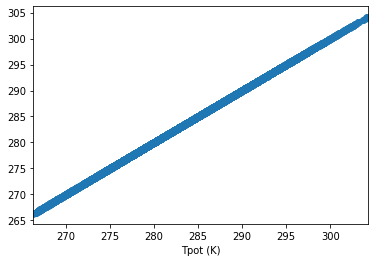

In [37]:
## regplot(y_train--> actual values and y_train_pred--> predicted values)
sns.regplot(train_y, y_train_pred)

In [138]:
## Test the model on testing data
y_test_pred = lm.predict(test_x)  # test data--> unseen data
y_test_pred

array([289.95274352, 279.52429024, 293.0197521 , ..., 288.49897884,
       293.84574524, 288.56998002])

In [39]:
## We need to compare the actual values(y_test) and the predicted values(y_test_pred)
    
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('R^2:', r2_score(test_y,y_test_pred))
print('Adjusted R^2:', 1- (1-r2_score(test_y, y_test_pred))*(len(test_x)-1)/(len(test_x)-test_x.shape[1]-1))
print('MAE:', mean_absolute_error(test_y, y_test_pred))
print('MSE:', mean_squared_error(test_y, y_test_pred))
print('RMSE', np.sqrt(mean_squared_error(test_y, y_test_pred)))

R^2: 0.9999917854507109
Adjusted R^2: 0.9999917782206543
MAE: 0.014752781605343343
MSE: 0.0004068274842570753
RMSE 0.02016996490470609


In [131]:
#accuracy score for linear regression
lm_score = (lm.score(test_x,test_y))*100
lm_score

99.99917854507109

# train model : rnn/lstm

In [84]:
# preparing the data
# features and target
# input and output 
# last 7 days data
X = [] ## input
y = [] ## ouput
for i  in range(df.shape[0]-7-1):   
  X.append(df['T (degC)'][i:i+7])# 0 -->[0:7], 1-->[1:8]
  y.append(df['T (degC)'][i+7])# 7,8,9
print(X[:2])

[0    0.71
1    0.75
2    0.73
3    0.37
4    0.33
5    0.34
6    0.19
Name: T (degC), dtype: float64, 1    0.75
2    0.73
3    0.37
4    0.33
5    0.34
6    0.19
7    0.03
Name: T (degC), dtype: float64]


In [85]:
import numpy as np
X = np.array(X)

In [86]:
df1  = pd.DataFrame(X,columns=['d1','d2','d3','d4','d5','d6','d7'])
df1.head()

,d1,d2,d3,d4,d5,d6,d7
0,0.71,0.75,0.73,0.37,0.33,0.34,0.19
1,0.75,0.73,0.37,0.33,0.34,0.19,0.03
2,0.73,0.37,0.33,0.34,0.19,0.03,0.11
3,0.37,0.33,0.34,0.19,0.03,0.11,0.22
4,0.33,0.34,0.19,0.03,0.11,0.22,-0.04


In [87]:
df1['d8'] = y
df1.head()


,d1,d2,d3,d4,d5,d6,d7,d8
0,0.71,0.75,0.73,0.37,0.33,0.34,0.19,0.03
1,0.75,0.73,0.37,0.33,0.34,0.19,0.03,0.11
2,0.73,0.37,0.33,0.34,0.19,0.03,0.11,0.22
3,0.37,0.33,0.34,0.19,0.03,0.11,0.22,-0.04
4,0.33,0.34,0.19,0.03,0.11,0.22,-0.04,-0.21


In [88]:
df1['d8'] = y
df1.head()


,d1,d2,d3,d4,d5,d6,d7,d8
0,0.71,0.75,0.73,0.37,0.33,0.34,0.19,0.03
1,0.75,0.73,0.37,0.33,0.34,0.19,0.03,0.11
2,0.73,0.37,0.33,0.34,0.19,0.03,0.11,0.22
3,0.37,0.33,0.34,0.19,0.03,0.11,0.22,-0.04
4,0.33,0.34,0.19,0.03,0.11,0.22,-0.04,-0.21


In [89]:
df.T[:10]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,27255,27256,27257,27258,27259,27260,27261,27262,27263,27264,27265,27266,27267,27268,27269,27270,27271,27272,27273,27274,27275,27276,27277,27278,27279,27280,27281,27282,27283,27284,27285,27286,27287,27288,27289,27290,27291,27292,27293,27294
Date Time,01.01.2020 00:10:00,01.01.2020 00:20:00,01.01.2020 00:30:00,01.01.2020 00:40:00,01.01.2020 00:50:00,01.01.2020 01:00:00,01.01.2020 01:10:00,01.01.2020 01:20:00,01.01.2020 01:30:00,01.01.2020 01:40:00,01.01.2020 01:50:00,01.01.2020 02:00:00,01.01.2020 02:10:00,01.01.2020 02:20:00,01.01.2020 02:30:00,01.01.2020 02:40:00,01.01.2020 02:50:00,01.01.2020 03:00:00,01.01.2020 03:10:00,01.01.2020 03:20:00,01.01.2020 03:30:00,01.01.2020 03:40:00,01.01.2020 03:50:00,01.01.2020 04:00:00,01.01.2020 04:10:00,01.01.2020 04:20:00,01.01.2020 04:30:00,01.01.2020 04:40:00,01.01.2020 04:50:00,01.01.2020 05:00:00,01.01.2020 05:10:00,01.01.2020 05:20:00,01.01.2020 05:30:00,01.01.2020 05:40:00,01.01.2020 05:50:00,01.01.2020 06:00:00,01.01.2020 06:10:00,01.01.2020 06:20:00,01.01.2020 06:30:00,01.01.2020 06:40:00,...,08.07.2020 08:00:00,08.07.2020 08:10:00,08.07.2020 08:20:00,08.07.2020 08:30:00,08.07.2020 08:40:00,08.07.2020 08:50:00,08.07.2020 09:00:00,08.07.2020 09:10:00,08.07.2020 09:20:00,08.07.2020 09:30:00,08.07.2020 09:40:00,08.07.2020 09:50:00,08.07.2020 10:00:00,08.07.2020 10:10:00,08.07.2020 10:20:00,08.07.2020 10:30:00,08.07.2020 10:40:00,08.07.2020 10:50:00,08.07.2020 11:00:00,08.07.2020 11:10:00,08.07.2020 11:20:00,08.07.2020 11:30:00,08.07.2020 11:40:00,08.07.2020 11:50:00,08.07.2020 12:00:00,08.07.2020 12:10:00,08.07.2020 12:20:00,08.07.2020 12:30:00,08.07.2020 12:40:00,08.07.2020 12:50:00,08.07.2020 13:00:00,08.07.2020 13:10:00,08.07.2020 13:20:00,08.07.2020 13:30:00,08.07.2020 13:40:00,08.07.2020 13:50:00,08.07.2020 14:00:00,08.07.2020 14:10:00,08.07.2020 14:20:00,08.07.2020 14:30:00
p (mbar),1008.89,1008.76,1008.66,1008.64,1008.61,1008.44,1008.49,1008.4,1008.29,1008.28,1008.24,1008.32,1008.24,1008.35,1008.3,1008.4,1008.39,1008.46,1008.15,1008.07,1008.12,1008.04,1008.16,1008,1007.76,1007.84,1007.85,1008.02,1007.92,1007.63,1007.63,1007.9,1007.99,1007.85,1007.81,1007.81,1007.91,1008.06,1008.22,1008.19,...,989.24,989.34,989.24,989.3,989.36,989.31,989.31,989.32,989.32,989.26,989.26,989.35,989.37,989.4,989.5,989.54,989.59,989.65,989.75,989.82,989.96,990.06,990.09,990.1,990.05,990.07,990.13,990.15,990.15,990.16,990.17,990.15,990.11,990.11,990.19,990.23,990.23,990.23,990.27,990.29
T (degC),0.71,0.75,0.73,0.37,0.33,0.34,0.19,0.03,0.11,0.22,-0.04,-0.21,-0.1,-0.16,-0.22,-0.06,-0.17,-0.05,-0.21,-0.77,-0.93,-0.86,-0.87,-1.02,-1.15,-1.08,-1.59,-1.82,-1.84,-1.84,-2.14,-2.34,-2.2,-2.3,-2.4,-2.51,-2.83,-2.79,-2.74,-2.63,...,12.62,12.64,12.62,12.71,12.83,12.96,13.06,13.19,13.49,13.63,13.59,13.49,13.33,13.08,13.01,12.84,12.74,12.75,12.85,13.02,13.29,13.36,13.43,13.43,13.39,13.49,13.6,13.69,13.97,14.16,14.31,14.32,14.53,14.51,14.6,14.77,14.75,14.68,14.47,14.5
Tpot (K),273.18,273.22,273.21,272.86,272.82,272.84,272.69,272.53,272.63,272.73,272.48,272.3,272.42,272.35,272.3,272.45,272.34,272.45,272.31,271.77,271.61,271.68,271.66,271.52,271.41,271.47,270.96,270.72,270.71,270.73,270.44,270.21,270.35,270.25,270.16,270.05,269.72,269.75,269.79,269.9,...,286.66,286.67,286.66,286.74,286.86,286.99,287.09,287.22,287.52,287.67,287.63,287.52,287.36,287.1,287.03,286.85,286.75,286.75,286.84,287.01,287.27,287.33,287.4,287.4,287.36,287.46,287.56,287.65,287.93,288.12,288.27,288.29,288.5,288.48,288.56,288.73,288.71,288.64,288.43,288.45
rh (%),86.1,85.2,85.1,86.3,87.4,87.1,87.4,88.1,88.1,87.4,87.5,89.1,88.6,88.1,88.9,88.2,88.6,88.5,88.7,89.2,90.6,90.8,90.9,90.9,91.4,91.7,90.5,92.1,92.4,93.2,92.3,93.4,93.8,93.7,94.1,94,94.1,94.6,94.8,95,...,94.5,95.1,95.4,96,96.1,96.3,95.6,95.8,94.4,93.3,93.2,92.3,90.9,92.9,94.2,95.1,95.2,96.2,96.2,95.6,92.6,91.4,90.2,90.1,89.7,90.8,89.8,90,88.8,88.6,87.2,87.3,84.5,82.9,83.5,83.9,82.7

In [90]:
df1.shape

(27287, 8)

In [91]:
27287 * 0.8

21829.600000000002

In [92]:
X_train = df1.iloc[0:21829,0:7]
X_train

,d1,d2,d3,d4,d5,d6,d7
0,0.71,0.75,0.73,0.37,0.33,0.34,0.19
1,0.75,0.73,0.37,0.33,0.34,0.19,0.03
2,0.73,0.37,0.33,0.34,0.19,0.03,0.11
3,0.37,0.33,0.34,0.19,0.03,0.11,0.22
4,0.33,0.34,0.19,0.03,0.11,0.22,-0.04
...,...,...,...,...,...,...,...
21824,16.67,16.55,16.64,17.16,17.68,17.66,17.43
21825,16.55,16.64,17.16,17.68,17.66,17.43,17.47
21826,16.64,17.16,17.68,17.66,17.43,17.47,17.72
21827,17.16,17.68,17.66,17.43,17.47,17.72,17.52


In [93]:
X_train = df1.iloc[0:21829,0:7]
X_test = df1.iloc[21829:,0:7]
y_train =  df1['d8'][:21829]
y_test  = df1['d8'][21829:]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(21829, 7)
(21829,)
(5458, 7)
(5458,)


In [94]:
X_train = df1.iloc[0:21829,0:7]
y_train =  df1['d8'][:21829]
X_train
y_train

0         0.03
1         0.11
2         0.22
3        -0.04
4        -0.21
         ...  
21824    17.47
21825    17.72
21826    17.52
21827    17.67
21828    18.07
Name: d8, Length: 21829, dtype: float64

In [95]:
## Sacling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = pd.DataFrame(sc.transform(X_train),columns = X_train.columns)
X_test_sc = pd.DataFrame(sc.transform(X_test),columns = X_train.columns)
X_train_sc.describe()

,d1,d2,d3,d4,d5,d6,d7
count,2.182900e+04,2.182900e+04,2.182900e+04,2.182900e+04,2.182900e+04,2.182900e+04,2.182900e+04
mean,-1.207467e-15,-1.035306e-16,9.661468e-16,-2.023791e-15,1.364370e-15,2.367726e-15,3.285556e-18
std,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00
min,-2.456158e+00,-2.456185e+00,-2.456218e+00,-2.456251e+00,-2.456288e+00,-2.456332e+00,-2.456372e+00
25%,-7.131797e-01,-7.132859e-01,-7.133920e-01,-7.134983e-01,-7.136094e-01,-7.137217e-01,-7.138335e-01
50%,-1.345609e-01,-1.346931e-01,-1.330433e-01,-1.331742e-01,-1.333100e-01,-1.334450e-01,-1.335807e-01
75%,6.416784e-01,6.415113e-01,6.413484e-01,6.411847e-01,6.410160e-01,6.408508e-01,6.406829e-01
max,2.982859e+00,2.982587e+00,2.982325e+00,2.982063e+00,2.981794e+00,2.981538e+00,2.981273e+00


In [96]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
model = Sequential()
model.add(LSTM(256,input_shape=(7,1)))
model.add(Dense(1))
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________


In [97]:

df.shape

(27295, 8)

In [98]:
model.compile(optimizer='adam',loss='mse')

In [99]:
X_test.shape

(5458, 7)

In [100]:
X_train.shape

(21829, 7)

In [101]:
X_train_sc = X_train_sc.values.reshape(21829,7,1)
X_test_sc = X_test_sc.values.reshape(5458,7,1)

In [102]:
history = model.fit(X_train_sc,y_train,epochs=100,validation_data=(X_test_sc,y_test))

Train on 21829 samples, validate on 5458 samples
Epoch 1/100
21829/21829 [==============================] - 21s 943us/step - loss: 2.7543 - val_loss: 1.5043
Epoch 2/100
21829/21829 [==============================] - 20s 936us/step - loss: 0.3838 - val_loss: 0.5023
Epoch 3/100
21829/21829 [==============================] - 20s 928us/step - loss: 0.1995 - val_loss: 0.4053
Epoch 4/100
21829/21829 [==============================] - 20s 926us/step - loss: 0.1737 - val_loss: 0.2760
Epoch 5/100
21829/21829 [==============================] - 20s 935us/step - loss: 0.1171 - val_loss: 0.3510
Epoch 6/100
21829/21829 [==============================] - 20s 934us/step - loss: 0.1043 - val_loss: 0.1547
Epoch 7/100
21829/21829 [==============================] - 20s 929us/step - loss: 0.0801 - val_loss: 0.1961
Epoch 8/100
21829/21829 [==============================] - 20s 928us/step - loss: 0.0702 - val_loss: 0.1011
Epoch 9/100
21829/21829 [==============================] - 20s 926us/step - loss: 0.060

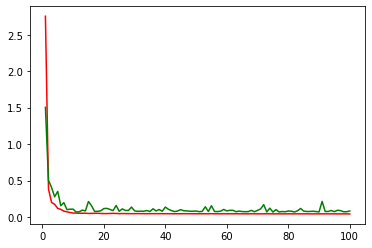

In [103]:
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
ep = list(range(1,101))
plt.plot(ep,tr_loss,color='r')
plt.plot(ep,val_loss,color='g')

In [104]:
model.predict(X_test_sc)

array([[18.087706],
       [18.460659],
       [18.128067],
       ...,
       [14.75663 ],
       [14.651346],
       [14.588213]], dtype=float32)

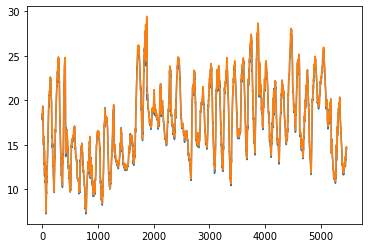

In [105]:
plt.plot(range(len(X_test_sc)),model.predict(X_test_sc).flat)
plt.plot(range(len(X_test_sc)),y_test)

In [106]:
X_test_sc[0].reshape(1,7)

array([[1.83452331, 1.79335594, 1.80026549, 1.84455613, 1.80873511,
        1.83522413, 1.90620355]])

In [107]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
model2 = Sequential()
# 256 cels
model2.add(LSTM(256,input_shape=(7,1)))
model2.add(Dropout(0.3))
# single neuron
model2.add(Dense(1))
model2.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________


In [108]:
model2.compile(optimizer='adam',loss='mse')

In [109]:
history2 = model2.fit(X_train_sc,y_train,epochs=100,validation_data=(X_test_sc,y_test))

Train on 21829 samples, validate on 5458 samples
Epoch 1/100
21829/21829 [==============================] - 20s 929us/step - loss: 3.0594 - val_loss: 1.4150
Epoch 2/100
21829/21829 [==============================] - 20s 915us/step - loss: 0.6803 - val_loss: 1.2792
Epoch 3/100
21829/21829 [==============================] - 20s 917us/step - loss: 0.4478 - val_loss: 0.3187
Epoch 4/100
21829/21829 [==============================] - 20s 915us/step - loss: 0.3872 - val_loss: 0.3599
Epoch 5/100
21829/21829 [==============================] - 20s 914us/step - loss: 0.3412 - val_loss: 0.3732
Epoch 6/100
21829/21829 [==============================] - 20s 919us/step - loss: 0.3503 - val_loss: 0.2075
Epoch 7/100
21829/21829 [==============================] - 20s 905us/step - loss: 0.3137 - val_loss: 0.1807
Epoch 8/100
21829/21829 [==============================] - 20s 901us/step - loss: 0.2877 - val_loss: 0.1330
Epoch 9/100
21829/21829 [==============================] - 20s 909us/step - loss: 0.325

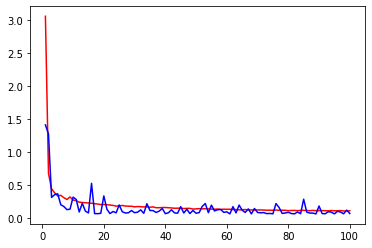

In [110]:
tr_loss = history2.history['loss']
val_loss = history2.history['val_loss']
ep = list(range(1,101))
plt.plot(ep,tr_loss,color='r')
plt.plot(ep,val_loss,color='b')


In [111]:
model.predict(X_test_sc)

array([[18.087706],
       [18.460659],
       [18.128067],
       ...,
       [14.75663 ],
       [14.651346],
       [14.588213]], dtype=float32)

In [112]:
predictions = model.predict(X_test_sc)
print(X_test_sc, predictions)


[[[1.83452331]
  [1.79335594]
  [1.80026549]
  ...
  [1.80873511]
  [1.83522413]
  [1.90620355]]

 [[1.7935749 ]
  [1.80047708]
  [1.84477075]
  ...
  [1.835436  ]
  [1.90642374]
  [1.97206046]]

 [[1.80069636]
  [1.84498421]
  [1.80916654]
  ...
  [1.90663839]
  [1.97228337]
  [1.93646213]]

 ...

 [[1.21139538]
  [1.2379069 ]
  [1.23949913]
  ...
  [1.27293715]
  [1.28876716]
  [1.31883111]]

 [[1.23810086]
  [1.23968719]
  [1.27688355]
  ...
  [1.28895769]
  [1.31902699]
  [1.31527128]]

 [[1.23988123]
  [1.27707318]
  [1.27332313]
  ...
  [1.3192187 ]
  [1.31546701]
  [1.30281187]]] [[18.087706]
 [18.460659]
 [18.128067]
 ...
 [14.75663 ]
 [14.651346]
 [14.588213]]


In [115]:
y_train_pred = model.predict(X_test_sc)
y_train_pred

array([[18.087706],
       [18.460659],
       [18.128067],
       ...,
       [14.75663 ],
       [14.651346],
       [14.588213]], dtype=float32)

In [133]:
model_score = (model.score(X_test_sc,test_y))*100 -----> accuracy_score of RNN
model_score

99.99917854507109